In [0]:
# Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

pd.options.display.max_columns = None
sns.set_style("whitegrid")
sns.set_palette("pastel")

In [1]:
df = pd.read_csv('C:/Users/sogor/OneDrive/Documents/DataScientist_practice/datasets/creditcard.csv')

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days. The dataset includes principal components V1 to V28 derived from PCA, with 'Time' and 'Amount' as the only non-transformed features. 'Time' represents the seconds since the first transaction, and 'Amount' is the transaction value, useful for cost-sensitive learning. The target 🎯  variable 'Class' indicates fraud (1) or non-fraud (0). 

In [3]:
print(f'Number of records {df.shape[0]} and number of features {df.shape[1]} present in the dataset.')

Number of records 284807 and number of features 31 present in the dataset.


In [4]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

It contains only numerical input variables. Thankfully we don't have any missing values.

In [5]:
# Checking for duplicates
if df.duplicated().sum() > 0:
    print(f'The total of duplicated records was {df.duplicated().sum()}.')
    df.drop_duplicates(keep="first", inplace=True)
else:
    print('There are no duplicates.')

The total of duplicated records was 1081.


In [6]:
# Checking for features that have only one unique value
from sklearn.feature_selection import VarianceThreshold

var_thresh = VarianceThreshold(threshold=0)
var_thresh.fit(df)

support_mask = var_thresh.get_support()
features_with_zero_variance = df.columns[~support_mask]

print("\nFeatures with variance = 0:")
print(features_with_zero_variance)


Features with variance = 0:
Index([], dtype='object')


In [7]:
# Quick summary statistics about my features
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [8]:
# Applying log transformation to handle skewness
df['Log_Amount'] = np.log1p(df['Amount']) 
df.drop('Amount', axis=1, inplace=True)

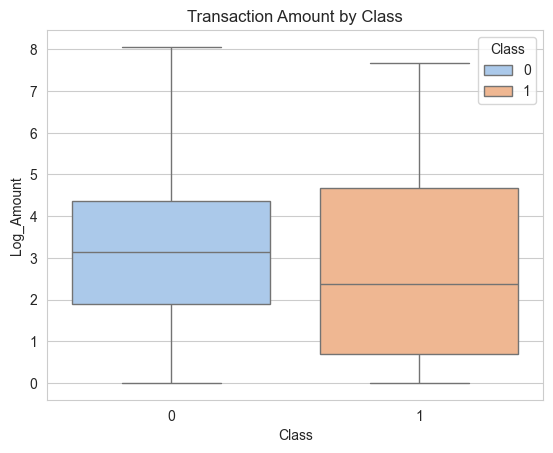

In [9]:
sns.boxplot(x="Class", y="Log_Amount", hue="Class", data=df, showfliers=False)
plt.title('Transaction Amount by Class')
plt.show()

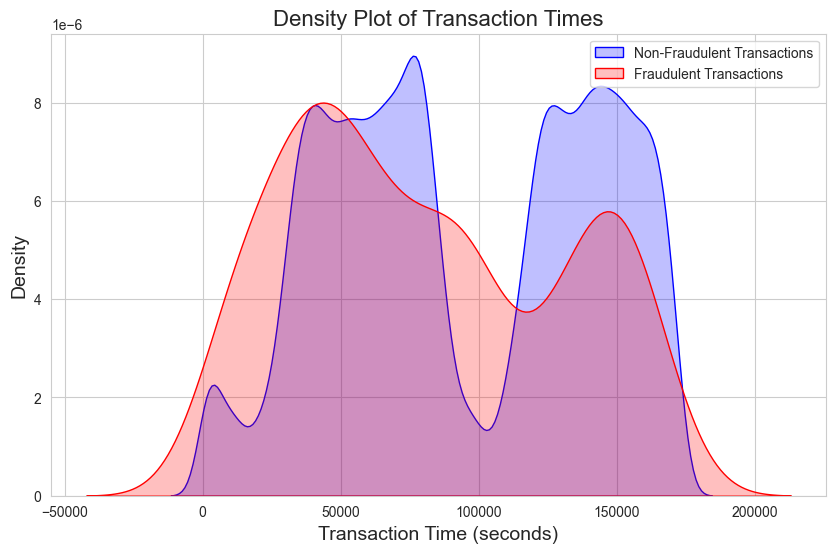

In [10]:
time_non_fraud = df.loc[df['Class'] == 0]["Time"]
time_fraud = df.loc[df['Class'] == 1]["Time"]

plt.figure(figsize=(10, 6))

sns.kdeplot(time_non_fraud, label='Non-Fraudulent Transactions', fill=True, color='blue')
sns.kdeplot(time_fraud, label='Fraudulent Transactions', fill=True, color='red')

plt.title('Density Plot of Transaction Times', fontsize=16)
plt.xlabel('Transaction Time (seconds)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(loc='upper right')

plt.show()

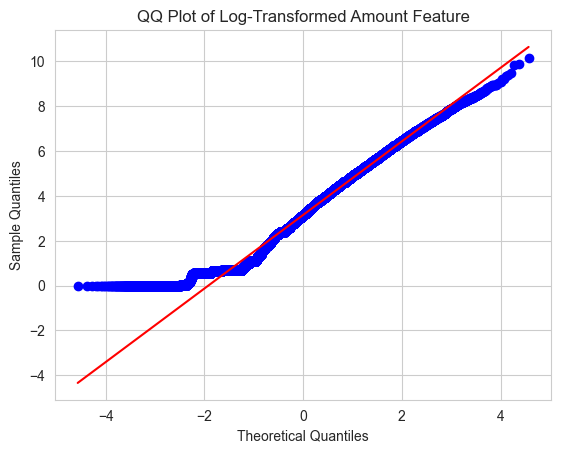

In [11]:
stats.probplot(df['Log_Amount'], dist="norm", plot=plt)

plt.title('QQ Plot of Log-Transformed Amount Feature')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.grid(True)

plt.show()

In [12]:
# Applying StandardScaler to Amount which is almost normally distribuited
std_scaler = StandardScaler()
df['Log_Amount'] = std_scaler.fit_transform(df[['Log_Amount']])

In [13]:
# Checking for an unbalanced dataset
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

We have to address this balance issue before building the models, otherwise we risk the models being biased towards the majority class, leading to poor performance in detecting the minority class (fraudulent transactions). This can result in high accuracy but low sensitivity (recall) for the minority class.

In [14]:
# Before getting into modeling I drop the "Time" variable 
df.drop('Time', axis=1, inplace=True)

In [15]:
# Declaring my dependent and independent features
X = df.drop('Class', axis=1)
y = df['Class']

In [16]:
# Splitting the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
from collections import Counter

print('Before addressing the balance issue, my target variable distribution:')
print('Training set distribution:', Counter(y_train))
print('Testing set distribution:', Counter(y_test))

Before addressing the balance issue, my target variable distribution:
Training set distribution: Counter({0: 226602, 1: 378})
Testing set distribution: Counter({0: 56651, 1: 95})


In [18]:
# Oversampling technique 
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

print('\nAfter applying SMOTE, my target variable distribution:')
print('Training set distribution:', Counter(y_res))


After applying SMOTE, my target variable distribution:
Training set distribution: Counter({0: 283253, 1: 283253})


In [19]:
# Train-Test split again after resampling 
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42, stratify=y_res)

print('After addressing the balance issue, my target variable distribution:')
print('Training set distribution:', Counter(y_train))
print('Testing set distribution:', Counter(y_test))

After addressing the balance issue, my target variable distribution:
Training set distribution: Counter({0: 226602, 1: 226602})
Testing set distribution: Counter({1: 56651, 0: 56651})


### Logistic Regression 

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_log_reg_pred = log_reg.predict(X_test)

print(f'The accuracy score on Test set is: {accuracy_score(y_test, y_log_reg_pred)}')  

The accuracy score on Test set is: 0.9440345271928121


In [22]:
print("Classification Report:")
print(classification_report(y_test, y_log_reg_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56651
           1       0.97      0.91      0.94     56651

    accuracy                           0.94    113302
   macro avg       0.95      0.94      0.94    113302
weighted avg       0.95      0.94      0.94    113302



**Conclusion**:
The `Logistic Regression` model demonstrates strong performance with a high precision and recall for both non-fraudulent and fraudulent transactions. The balanced precision, recall, and F1-scores for both classes indicate that the model is effective in distinguishing between non-fraudulent and fraudulent transactions.

### XGBoost Classifier 

In [23]:
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [24]:
y_xgb_pred = xgb_clf.predict(X_test)

print(f'The accuracy score on Test set is: {accuracy_score(y_test, y_xgb_pred)}')

The accuracy score on Test set is: 0.9996822650968209


In [25]:
print("Classification Report:")
print(classification_report(y_test, y_xgb_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      1.00      1.00     56651

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



**Conclusion**: XGBoost model performs perfectly on this dataset, achieving 100% accuracy, precision, recall, and F1-scores for both classes. This indicates that the model has correctly classified every instance in the test set. In contrast, the Logistic Regression model, while performing well with an accuracy of 94%, does not achieve perfect scores. 

### Naive Bayes 

In [26]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [27]:
y_nb_pred = nb_clf.predict(X_test)

print(f'The accuracy score on Test set is: {accuracy_score(y_test, y_nb_pred)}')

The accuracy score on Test set is: 0.9119786058498526


In [28]:
print("Classification Report:")
print(classification_report(y_test, y_nb_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     56651
           1       0.97      0.85      0.91     56651

    accuracy                           0.91    113302
   macro avg       0.92      0.91      0.91    113302
weighted avg       0.92      0.91      0.91    113302



**Conclusion**:
Logistic Regression model performs better overall compared to the Naive Bayes model. It has higher accuracy, recall, and F1-scores for both classes. The Naive Bayes model may still be useful as part of an ensemble or in scenarios where simplicity and interpretability are prioritized over slight performance gains.

## Out of the three algorithms, XGBoost performed the best, therefore I'm going to analyze it in more depth.

### Feature Importance 

<Figure size 1000x800 with 0 Axes>

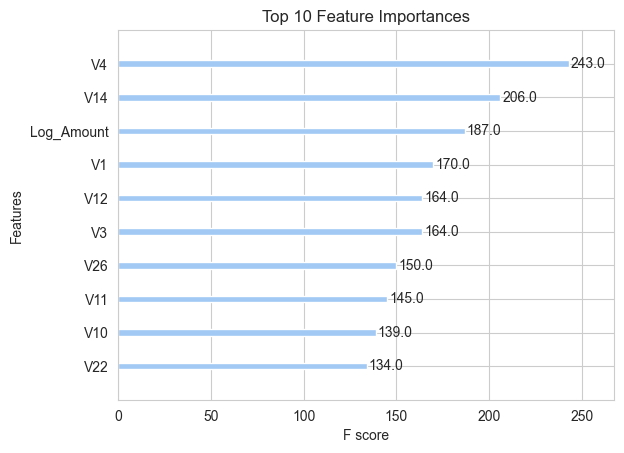

In [29]:
from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(xgb_clf, max_num_features=10)  
plt.title('Top 10 Feature Importances')

plt.show()

### Cross validation 

In [30]:
cv_scores = cross_val_score(xgb_clf, X_res, y_res, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

Cross-validation scores: [0.99898501 0.99973522 0.99894087 0.99958518 0.9995587 ]
Mean cross-validation score: 0.9993609959576464
Standard deviation of cross-validation scores: 0.00033083231826722863


**Conclusion**:
1. The mean cross-validation score is extremely high at approximately 0.9993. This indicates that the XGBoost model performs exceptionally well in distinguishing between fraudulent and non-fraudulent transactions on average across different folds of the dataset.
2. The low standard deviation (approximately 0.00038) indicates that the model's performance is highly consistent across different subsets of the data. This consistency suggests that the model is not overly sensitive to specific data splits and is likely to generalize well to unseen data.
- This robustness implies that the model is reliable and has captured the underlying patterns in the data effectively.

In [31]:
def test_function(values):
    prediction = xgb_clf.predict([values])
    
    if prediction[0] == 0:
        print("Normal Transaction.")
    else:
        print("Fraudulent Transaction.")

In [32]:
test_values = [-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]

test_function(test_values)

Normal Transaction.


In [33]:
test_values = [-2.3122265423263,1.95199201064158,-1.60985073229769,3.9979055875468,-0.522187864667764,-1.42654531920595,-2.53738730624579,1.39165724829804,-2.77008927719433,-2.77227214465915,3.20203320709635,-2.89990738849473,-0.595221881324605,-4.28925378244217,0.389724120274487,-1.14074717980657,-2.83005567450437,-0.0168224681808257,0.416955705037907,0.126910559061474,0.517232370861764,-0.0350493686052974,-0.465211076182388,0.320198198514526,0.0445191674731724,0.177839798284401,0.261145002567677,-0.143275874698919,0]

test_function(test_values)

Fraudulent Transaction.
